In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
dataset=pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")

In [61]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [62]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [63]:
dataset.shape

(614, 13)

In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [65]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [66]:
x=dataset.iloc[:,:-1].values

In [67]:
y=dataset.iloc[:,-1].values

In [68]:
dataset['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [107]:
dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [108]:
dataset['Dependents'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    4
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: object>

In [109]:
dataset=dataset.replace(to_replace='3+',value=4)

In [110]:
dataset['Dependents'].values

array(['0', '1', '0', '0', '0', '2', '0', 4, '2', '1', '2', '2', '2', '0',
       '2', '0', '1', '0', '0', '0', '0', '1', '0', '2', '1', '0', '0',
       '2', '0', '2', '1', '0', '1', '0', 4, '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '2',
       '1', '2', '0', '0', '1', '2', '0', 4, '0', '1', '0', '0', '0', '1',
       4, '0', '0', '2', '0', 4, 4, '0', '0', '1', 4, 4, '0', '1', '2',
       '0', '1', '0', '2', '0', '0', '0', '0', '2', '2', '0', '0', '0',
       '0', '0', '0', '0', '2', '0', nan, '0', nan, '1', '2', '0', '2', 4,
       '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', nan, '0', '0',
       '2', '0', '0', 4, '0', '1', '0', '0', '0', '0', '0', '0', 4, '0',
       '2', '0', '2', '2', '0', '0', '0', '2', '0', '2', '1', '0', '0',
       '0', '0', '0', '2', '0', 4, '1', '1', '0', '0', '0', '0', '1', '2',
       '0', '0', '0', '0', '0', '2', '0', 4, 4, '0', '0', '0', '2', 4,
       '1', '0', '1', '0', '0', '1', '0', '0', '1

In [111]:
import seaborn as sns

<Axes: xlabel='Education', ylabel='count'>

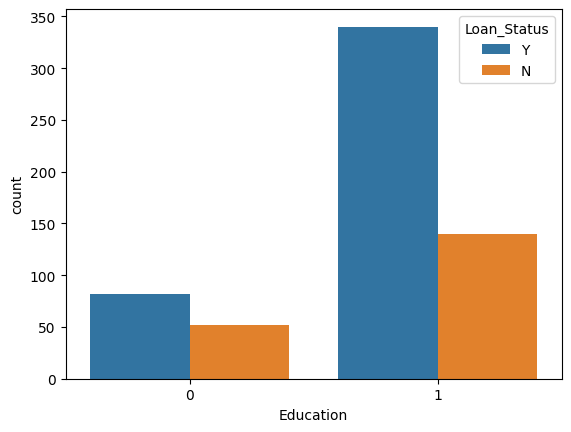

In [112]:
sns.countplot(x='Education',hue='Loan_Status',data=dataset)

<Axes: xlabel='Married', ylabel='count'>

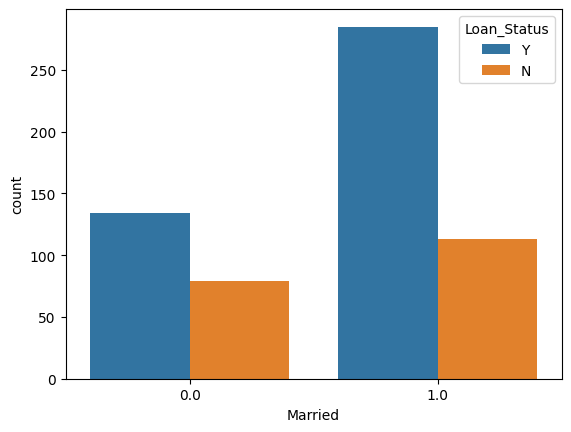

In [113]:
sns.countplot(x='Married',hue='Loan_Status',data=dataset)

In [114]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,1,Y
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,Y
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,Y
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,1.0,1.0,4,1,0.0,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,1,Y
612,LP002984,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,1,Y


In [115]:
from sklearn.impute import SimpleImputer

In [116]:
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")

In [117]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [140]:
x = dataset.drop(columns=['Loan_ID','Loan_Status','Dependents'],axis=1)
y = dataset['Loan_Status']

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
dataset.Gender.fillna(dataset.Gender.mean(), inplace=True)

In [143]:
dataset.Married.fillna(dataset.Married.mean(), inplace=True)

In [144]:
dataset.Self_Employed.fillna(dataset.Self_Employed.mean(), inplace=True)

In [145]:
dataset.LoanAmount.fillna(dataset.LoanAmount.mean(), inplace=True)

In [146]:
dataset.Loan_Amount_Term.fillna(dataset.Loan_Amount_Term.mean(), inplace=True)

In [147]:
dataset.Credit_History.fillna(dataset.Credit_History.mean(), inplace=True)

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [151]:
from sklearn.svm import SVC

In [152]:
svc=SVC(kernel='linear')

In [156]:
x_train.isnull().sum()

Gender                0
Married               0
Education             0
Self_Employed        28
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     11
Credit_History       41
Property_Area         0
dtype: int64

In [157]:
y_train.isnull().sum()

0

In [158]:
x_train.Self_Employed.fillna(x_train.Self_Employed.mean(),inplace=True)

In [159]:
x_train.LoanAmount.fillna(x_train.LoanAmount.mean(),inplace=True)

In [160]:
x_train.Loan_Amount_Term.fillna(x_train.Loan_Amount_Term.mean(),inplace=True)

In [161]:
x_train.Credit_History.fillna(x_train.Credit_History.mean(),inplace=True)

In [162]:
x_train.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [164]:
y_train.isnull().sum()

0

In [165]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [167]:
y_test

454    Y
52     N
536    Y
469    N
55     Y
      ..
337    Y
376    Y
278    Y
466    N
303    Y
Name: Loan_Status, Length: 123, dtype: object

In [171]:
y_test=y_test.replace(to_replace='Y',value=1)

In [172]:
y_test=y_test.replace(to_replace='N',value=0)

In [173]:
y_test

454    1
52     0
536    1
469    0
55     1
      ..
337    1
376    1
278    1
466    0
303    1
Name: Loan_Status, Length: 123, dtype: int64

In [178]:
y_test=np.array([y_test])

In [179]:
y_test

array([[1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1]])

In [183]:
y_pred=svc.predict([[1,0,1,1,0,0,1,0,1,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [184]:
print(y_pred)

['Y']
